# **Objetivo de Negocio**

- Predecir la eficiencia de recuperación de oro en dos momentos clave del proceso:

- Después de la Flotación (rougher.output.recovery)

- Después de la Purificación final (final.output.recovery)

# **ANALISIS INICIAL**

### Carga de librerias

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


%matplotlib inline
sns.set(style="whitegrid")

### Funcion para explorar datos

In [2]:
# Carga de datasets usando ruta relativa
train = pd.read_csv('datasets/gold_recovery_train.csv', parse_dates=['date'])
test = pd.read_csv('datasets/gold_recovery_test.csv', parse_dates=['date'])
full = pd.read_csv('datasets/gold_recovery_full.csv', parse_dates=['date'])

# Verificamos tamaños
print("Tamaño de train:", train.shape)
print("Tamaño de test:", test.shape)
print("Tamaño de full:", full.shape)

# Vemos las primeras filas de cada dataset
display(train.head())
display(test.head())
display(full.head())

# Listamos las columnas
print("Columnas en train:")
print(train.columns)
print("\nColumnas en test:")
print(test.columns)
print("\nColumnas en full:")
print(full.columns)

Tamaño de train: (16860, 87)
Tamaño de test: (5856, 53)
Tamaño de full: (22716, 87)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Columnas en train:
Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
  

#### **Observaciones**

Train y Full: Tienen muchísimas columnas, incluyendo las columnas objetivo (rougher.output.recovery, final.output.recovery y otras salidas intermedias y finales).

Test: Solo tiene las columnas que a usar para predecir (es decir, SOLO los datos disponibles antes de saber el resultado).

**Columnas Clave** 

a) Objetivo (target) – solo en train/full
`rougher.output.recovery` — Qué tanto oro se recupera tras la flotación (lo que hay que predecir).

`final.output.recovery` — Qué tanto oro se recupera al final (lo que hay que predecir).

b) Entradas del proceso (features disponibles en train y test) que se pueden usar para entrenar los modelos:

primary_cleaner.input.sulfate

primary_cleaner.input.depressant

primary_cleaner.input.feed_size

primary_cleaner.input.xanthate

rougher.input.feed_ag

rougher.input.feed_pb

rougher.input.feed_rate

rougher.input.feed_size

rougher.input.feed_sol

rougher.input.feed_au

rougher.input.floatbank10_sulfate

rougher.input.floatbank10_xanthate

rougher.input.floatbank11_sulfate

rougher.input.floatbank11_xanthate

primary_cleaner.state.* y rougher.state.*

secondary_cleaner.state.*



# **EDA**

=== TRAIN ===
Forma: (16860, 87)

Tipos de columnas:
float64           86
datetime64[ns]     1
Name: count, dtype: int64

Primeras filas:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Descripción numérica:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16860,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,2017-05-02 03:04:06.401363968,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
min,2016-01-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,2016-07-08 14:44:59,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,2017-05-02 05:29:59,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,2018-02-23 20:14:59,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,2018-08-18 10:59:59,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927
std,NaN,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888



Valores nulos por columna (top 10):
rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64

Valores únicos por columna (top 10):
date                                                  16860
rougher.calculation.floatbank11_sulfate_to_au_feed    16833
rougher.calculation.sulfate_to_au_concentrate         16833
rougher.calculation.floatbank10_sulfate_to_au_feed    16833
primary_cleaner.state.floatbank8_c_level              16828
primary_cleaner.state.floatbank8_d_level              16828
primary_cleaner.state.floatbank8_b_level              16827
primary_cleaner.state.floatbank8_a_level              16826
ro

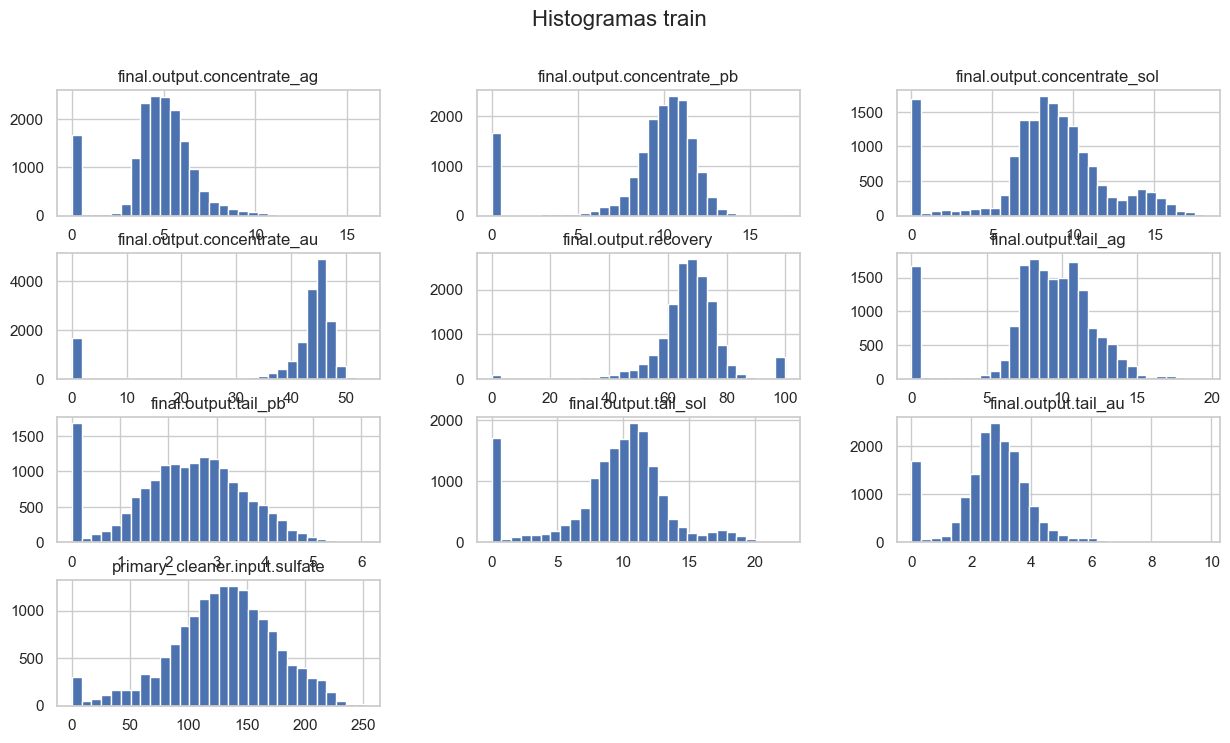


Boxplots (primeras variables numéricas):


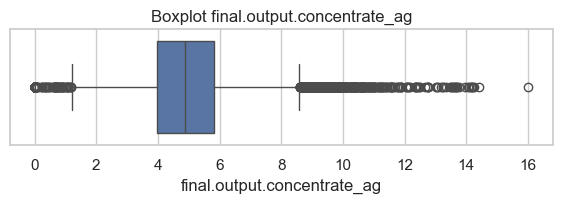

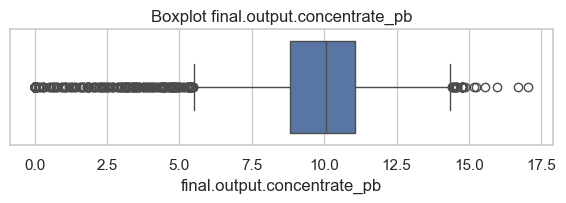

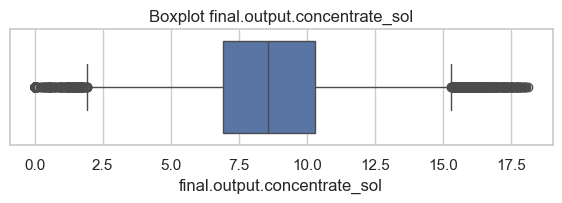

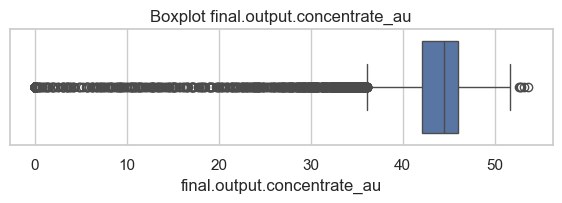

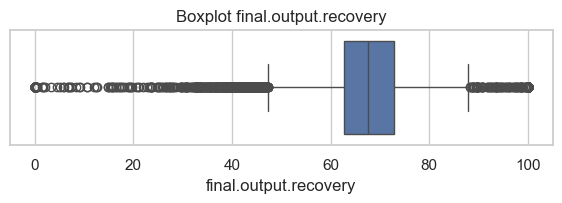

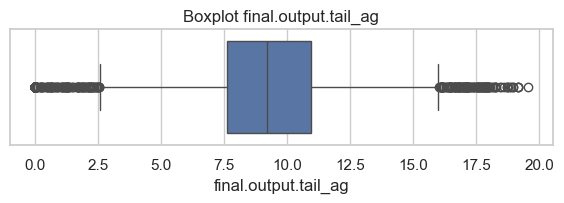

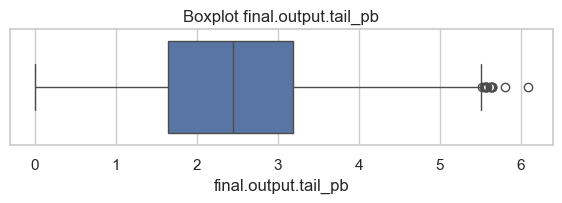

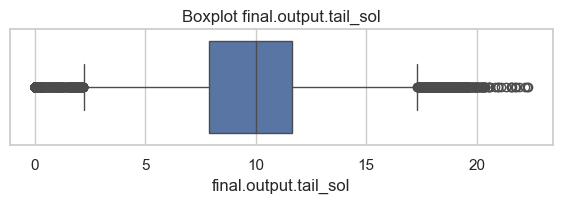

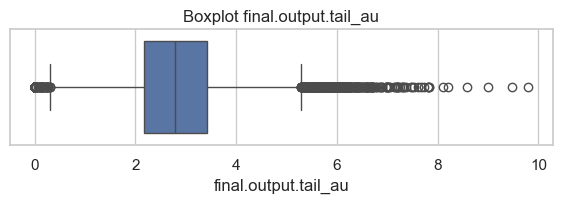

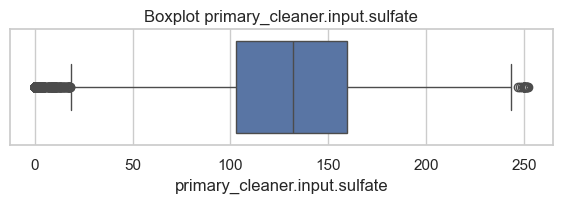



=== TEST ===
Forma: (5856, 53)

Tipos de columnas:
float64           52
datetime64[ns]     1
Name: count, dtype: int64

Primeras filas:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



Descripción numérica:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5856,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2017-05-02 12:29:59.000000256,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
min,2016-09-01 00:59:59,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,2016-11-01 00:44:59,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,2017-05-02 12:29:59,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,2017-11-01 00:14:59,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,2017-12-31 23:59:59,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593
std,NaN,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839



Valores nulos por columna (top 10):
rougher.input.floatbank11_xanthate          353
primary_cleaner.input.sulfate               302
primary_cleaner.input.depressant            284
rougher.input.floatbank10_sulfate           257
primary_cleaner.input.xanthate              166
rougher.input.floatbank10_xanthate          123
rougher.input.feed_sol                       67
rougher.input.floatbank11_sulfate            55
rougher.input.feed_rate                      40
secondary_cleaner.state.floatbank3_a_air     34
dtype: int64

Valores únicos por columna (top 10):
date                                          5856
primary_cleaner.state.floatbank8_d_level      5840
secondary_cleaner.state.floatbank5_b_level    5840
secondary_cleaner.state.floatbank5_a_air      5840
secondary_cleaner.state.floatbank4_b_level    5840
secondary_cleaner.state.floatbank3_b_level    5840
secondary_cleaner.state.floatbank3_a_level    5840
secondary_cleaner.state.floatbank2_a_level    5840
rougher.state.floatbank1

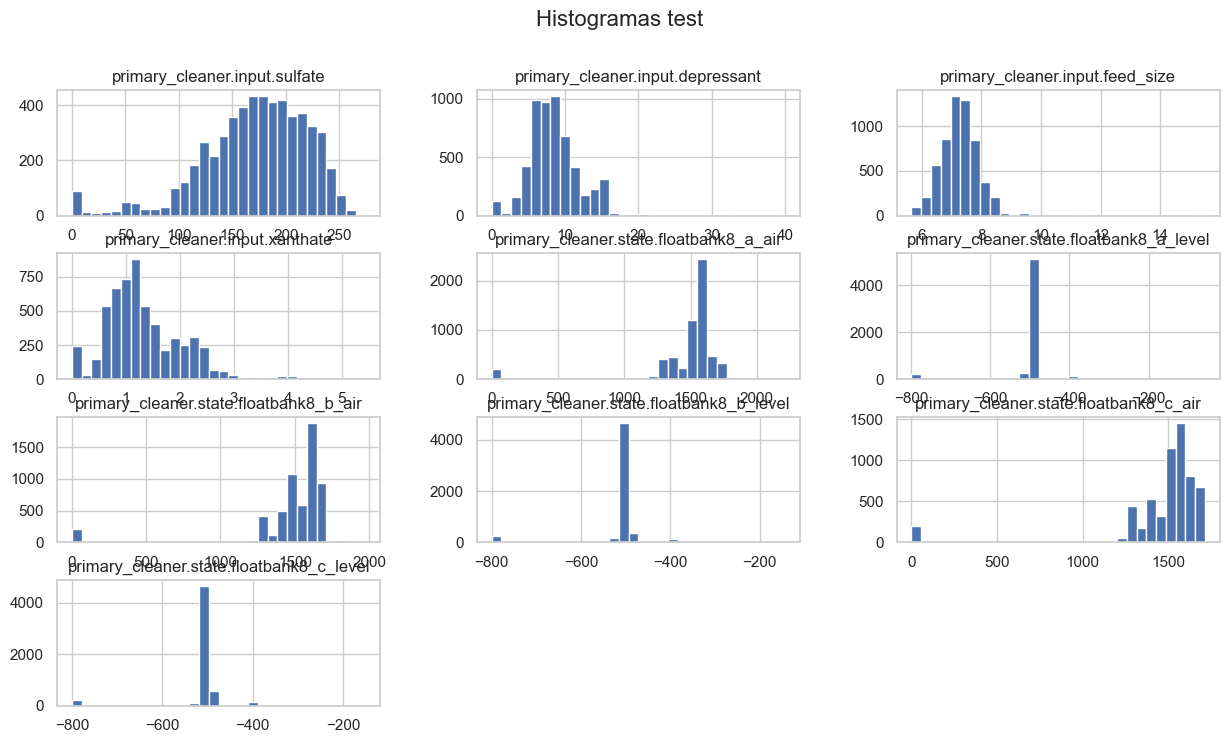


Boxplots (primeras variables numéricas):


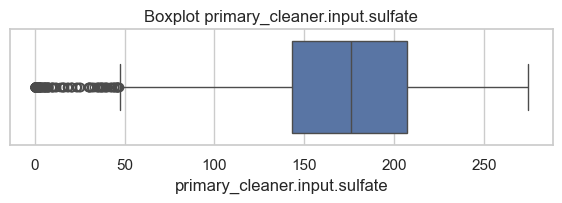

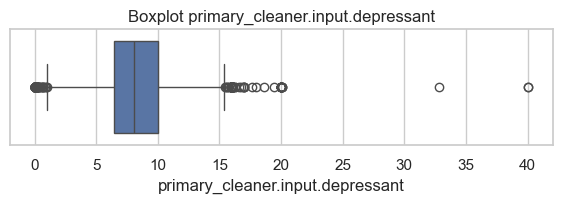

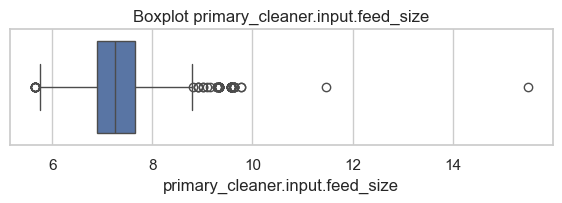

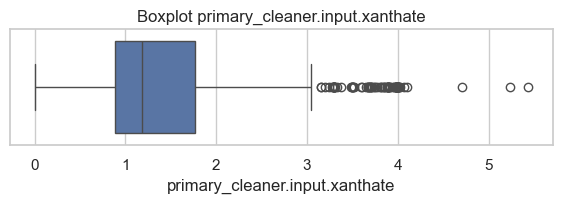

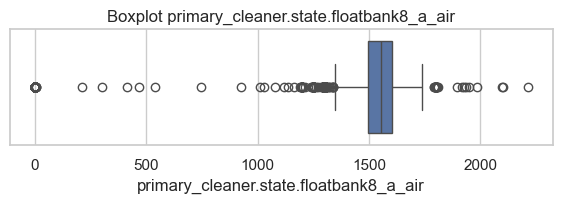

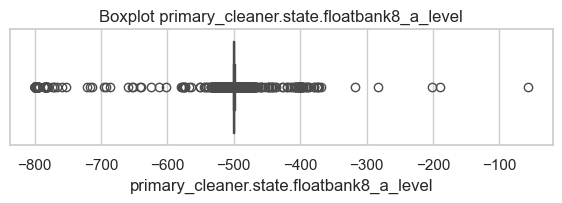

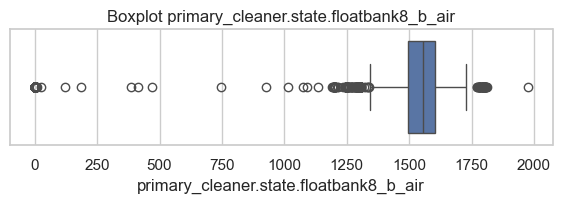

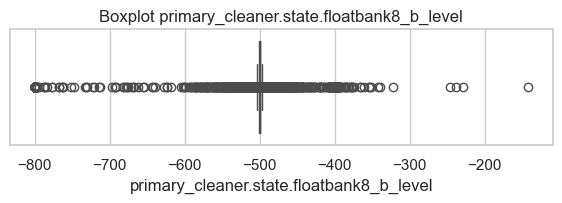

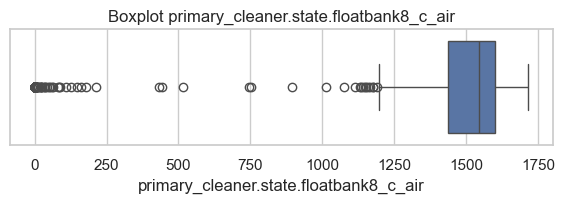

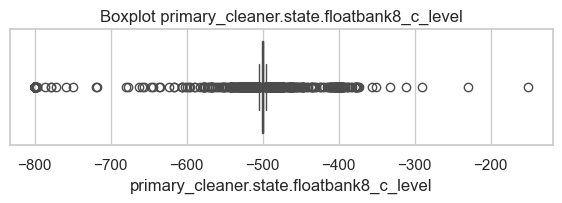



=== FULL ===
Forma: (22716, 87)

Tipos de columnas:
float64           86
datetime64[ns]     1
Name: count, dtype: int64

Primeras filas:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Descripción numérica:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22716,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,2017-05-02 05:29:59.105080064,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
min,2016-01-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,2016-09-07 14:44:59,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,2017-05-02 05:29:59,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,2017-12-24 20:14:59,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,2018-08-18 10:59:59,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593
std,NaN,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151



Valores nulos por columna (top 10):
rougher.output.recovery               3119
rougher.output.tail_ag                2737
rougher.output.tail_au                2736
rougher.output.tail_sol               2736
rougher.input.floatbank11_xanthate    2257
secondary_cleaner.output.tail_sol     2215
final.output.recovery                 1963
rougher.calculation.au_pb_ratio       1627
primary_cleaner.input.sulfate         1609
primary_cleaner.input.depressant      1546
dtype: int64

Valores únicos por columna (top 10):
date                                                  22716
rougher.calculation.floatbank11_sulfate_to_au_feed    22672
rougher.calculation.sulfate_to_au_concentrate         22672
rougher.calculation.floatbank10_sulfate_to_au_feed    22672
primary_cleaner.state.floatbank8_c_level              22668
primary_cleaner.state.floatbank8_d_level              22668
primary_cleaner.state.floatbank8_b_level              22667
primary_cleaner.state.floatbank8_a_level              22665
ro

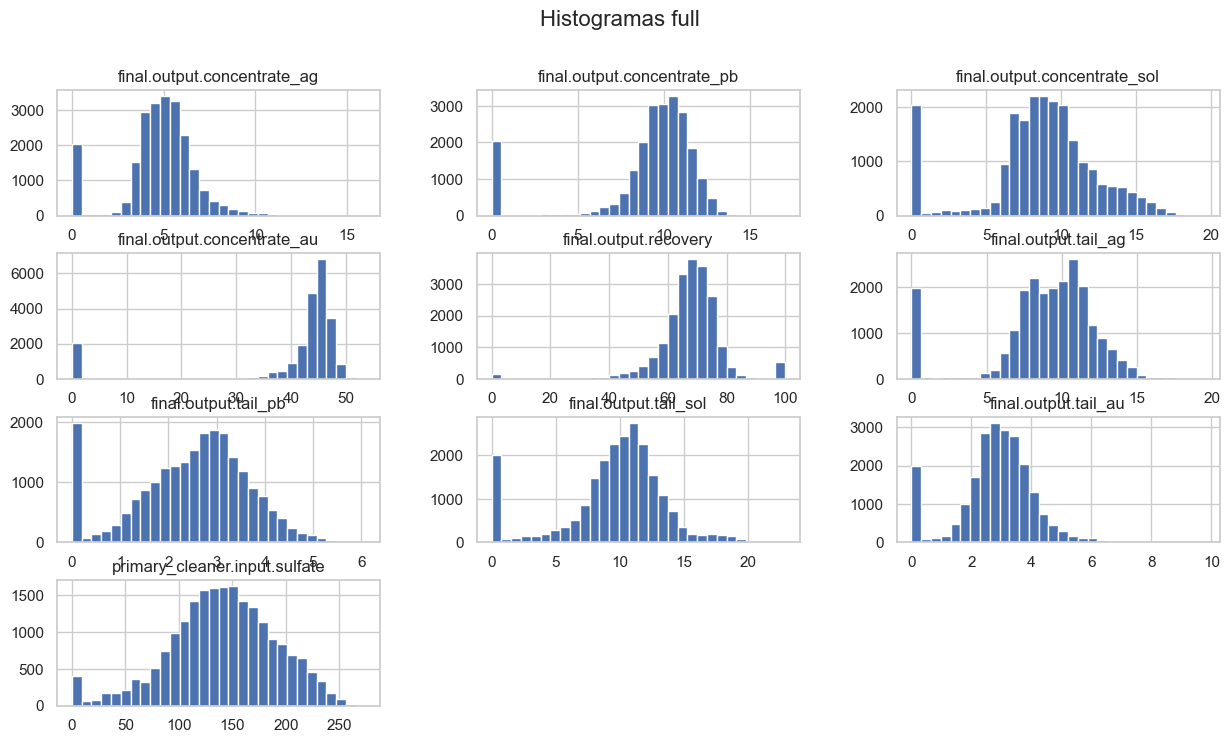


Boxplots (primeras variables numéricas):


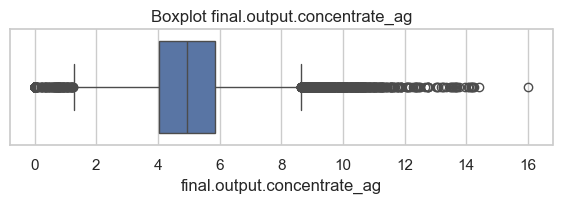

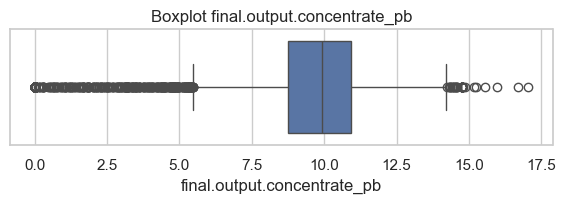

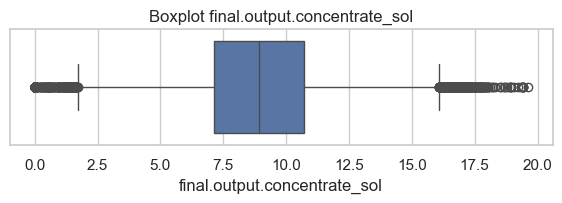

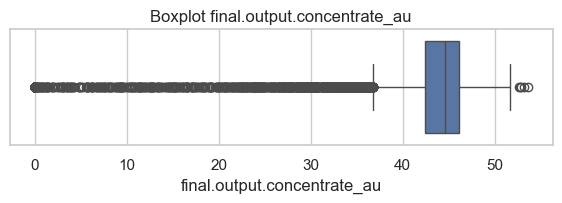

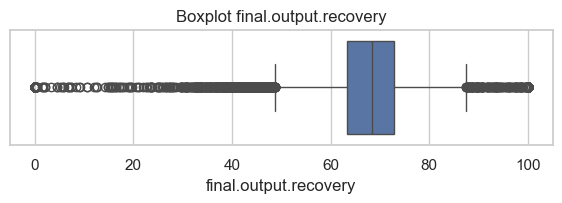

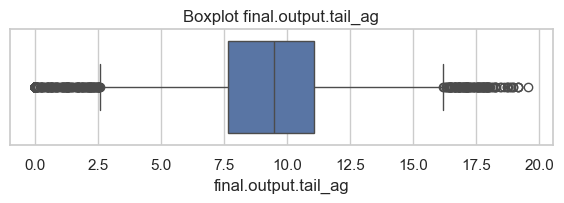

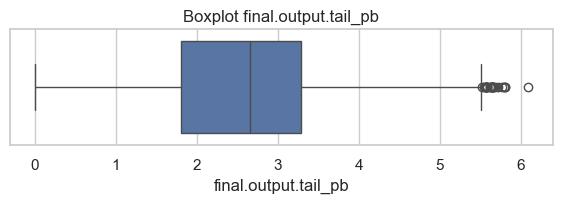

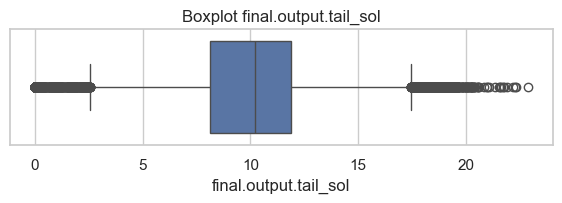

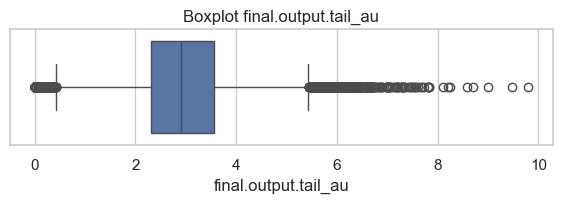

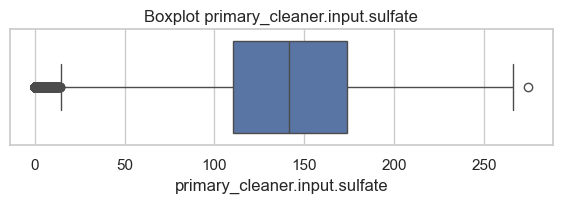

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda_completo(df, nombre="dataset", max_cols_hist=10):
    print(f"=== {nombre.upper()} ===")
    print(f"Forma: {df.shape}")
    print("\nTipos de columnas:")
    print(df.dtypes.value_counts())
    print("\nPrimeras filas:")
    display(df.head())
    print("\nDescripción numérica:")
    display(df.describe())
    print("\nValores nulos por columna (top 10):")
    print(df.isnull().sum().sort_values(ascending=False).head(10))
    print("\nValores únicos por columna (top 10):")
    print(df.nunique().sort_values(ascending=False).head(10))
    print("Duplicados:", df.duplicated().sum())
    
    # Visualización: histogramas de las primeras columnas numéricas
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        print("\nHistogramas de variables numéricas:")
        cols_to_plot = num_cols[:max_cols_hist]
        df[cols_to_plot].hist(figsize=(15,8), bins=30)
        plt.suptitle(f"Histogramas {nombre}", fontsize=16)
        plt.show()
    
        # Boxplots
        print("\nBoxplots (primeras variables numéricas):")
        for col in cols_to_plot:
            plt.figure(figsize=(7, 1.5))
            sns.boxplot(data=df, x=col)
            plt.title(f'Boxplot {col}')
            plt.show()
    print("\n" + "="*60 + "\n")

# Uso en tus datasets:
eda_completo(train, "train")
eda_completo(test, "test")
eda_completo(full, "full")


--------------------------------

## TRATAMIENTO DE LOS DATA SETS

In [4]:
def limpiar_dataframe(df, target_cols=None, umbral_nulos=0.20, drop_negativos=True, print_info=True):
    """
    Limpia un dataframe según reglas estándar de ciencia de datos:
    - Elimina filas con nulos en targets.
    - Elimina columnas con alto porcentaje de nulos (>umbral_nulos).
    - Imputa nulos restantes con la mediana.
    - Elimina filas con valores negativos en columnas de concentraciones y tails.
    
    Parámetros:
    - df: DataFrame original a limpiar.
    - target_cols: lista de columnas objetivo (solo en train; en test pon None).
    - umbral_nulos: máximo % de nulos aceptado por columna.
    - drop_negativos: si True, elimina filas con concentraciones negativas.
    - print_info: si True, imprime resumen del proceso.

    Devuelve:
    - DataFrame limpio.
    - Lista de columnas eliminadas por nulos.
    """
    df_clean = df.copy()
    cols_dropped = []

    # 1. Eliminar filas con nulos en targets (solo para train)
    if target_cols:
        before = df_clean.shape[0]
        df_clean = df_clean.dropna(subset=target_cols)
        if print_info:
            print(f"Filas eliminadas por nulos en targets: {before - df_clean.shape[0]}")

    # 2. Eliminar columnas con muchos nulos
    null_percent = df_clean.isnull().mean()
    cols_to_drop = null_percent[null_percent > umbral_nulos].index.tolist()
    cols_dropped += cols_to_drop
    df_clean = df_clean.drop(columns=cols_to_drop)
    if print_info and cols_to_drop:
        print(f"Columnas eliminadas por >{int(umbral_nulos*100)}% nulos: {cols_to_drop}")

    # 3. Imputar nulos restantes con la mediana
    df_clean = df_clean.fillna(df_clean.median())

    # 4. Eliminar valores imposibles (negativos) en concentraciones/tails
    if drop_negativos:
        # Solo para columnas numéricas de concentración/tail
        col_pattern = ['concentrate', 'tail']
        cols_check = [col for col in df_clean.columns if any(p in col for p in col_pattern)]
        for col in cols_check:
            before = df_clean.shape[0]
            df_clean = df_clean[df_clean[col] >= 0]
            if print_info and before != df_clean.shape[0]:
                print(f"Filas eliminadas con valores negativos en {col}: {before - df_clean.shape[0]}")
    
    df_clean = df_clean.reset_index(drop=True)
    if print_info:
        print(f"Shape final: {df_clean.shape}\n")
    return df_clean, cols_dropped

# USO PARA TRAIN (con targets)
train_clean, cols_drop_train = limpiar_dataframe(
    train, 
    target_cols=['rougher.output.recovery', 'final.output.recovery'],
    umbral_nulos=0.20,
    drop_negativos=True
)

# USO PARA TEST (sin targets)
test_clean, cols_drop_test = limpiar_dataframe(
    test,
    target_cols=None,  # test no tiene targets
    umbral_nulos=0.20,
    drop_negativos=True
)


Filas eliminadas por nulos en targets: 2711
Filas eliminadas con valores negativos en rougher.calculation.sulfate_to_au_concentrate: 28
Shape final: (14121, 87)

Shape final: (5856, 53)



Verificar Nulls despues de Limpieza y Tratamiento

In [5]:
print(train_clean.isnull().sum().sum())  # Debería ser 0
print(test_clean.isnull().sum().sum())   # Debería ser 0

0
0


### DETECCIÓN DE OUTLIERS PARA REUCPERACIÓN

In [6]:
for col in ['rougher.output.recovery', 'final.output.recovery']:
    menores_0 = (train[col] < 0).sum()
    mayores_100 = (train[col] > 100).sum()
    print(f"{col} -> Negativos: {menores_0}, Mayores a 100: {mayores_100}")


rougher.output.recovery -> Negativos: 0, Mayores a 100: 0
final.output.recovery -> Negativos: 0, Mayores a 100: 0


###  Verificar que train y test tengan las mismas columnas de features

Seleccionar las columnas que nos van a interesar para Features para posteriores etapas del flujo

In [7]:
# Lista de columnas en ambos sets (sin 'date')
features = [col for col in train_clean.columns if col in test_clean.columns and col != 'date']

print("Features finales usadas:", features)


Features finales usadas: ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher

----------

# **Análisis exploratorio de datos (EDA) posterior a limpieza**

### ¿Cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación?

C:\Users\Admin\AppData\Local\Temp\ipykernel_11332\561892287.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Rougher', 'Primary Cleaner', 'Final'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11332\561892287.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Rougher', 'Primary Cleaner', 'Final'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11332\561892287.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Rougher', 'Primary Cleaner', 'Final'])


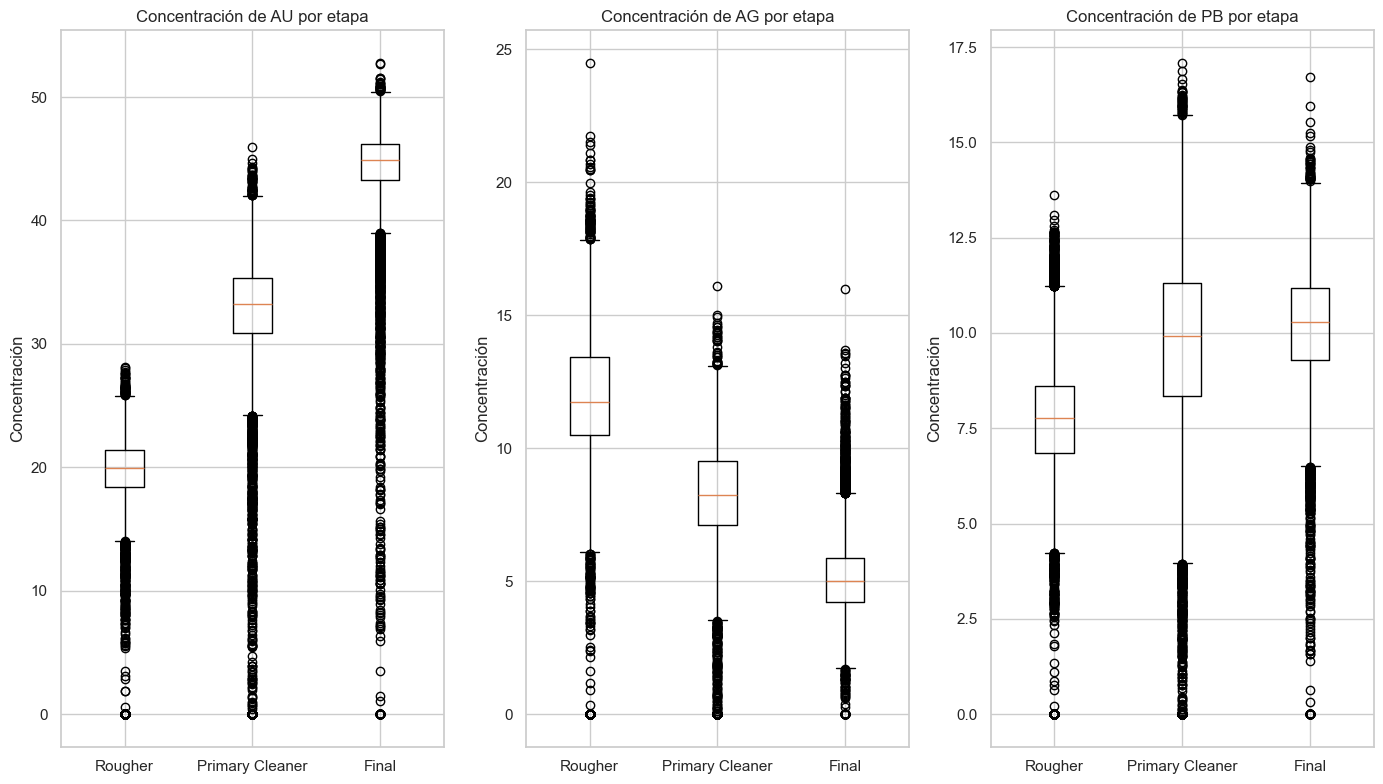

In [8]:
import matplotlib.pyplot as plt

etapas = {
    'Rougher': [
        'rougher.output.concentrate_au',
        'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb'
    ],
    'Primary Cleaner': [
        'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb'
    ],
    'Final': [
        'final.output.concentrate_au',
        'final.output.concentrate_ag',
        'final.output.concentrate_pb'
    ]
}

metales = ['au', 'ag', 'pb']

plt.figure(figsize=(14, 8))

for i, metal in enumerate(metales):
    plt.subplot(1, 3, i+1)
    data = [
        train_clean[etapas['Rougher'][i]],
        train_clean[etapas['Primary Cleaner'][i]],
        train_clean[etapas['Final'][i]]
    ]
    plt.boxplot(data, labels=['Rougher', 'Primary Cleaner', 'Final'])
    plt.title(f'Concentración de {metal.upper()} por etapa')
    plt.ylabel('Concentración')
plt.tight_layout()
plt.show()


## OBSERVACIONES
Como era esperado, la concentración de oro aumenta a medida que avanza el proceso de purificación, ya que se busca aislarlo, mientras que la de plata disminuye, sin embargo para plomo no se ve una disminución sino un pequeño aumento.


La **concentración de oro (Au)** *aumenta progresivamente* desde la etapa Rougher hasta la etapa Final, lo cual es coherente con el proceso de purificación y esperado en la planta.

La **plata (Ag) y el plomo (Pb)** *disminuyen en la etapa final*, lo que indica que el concentrado final es cada vez más puro en oro y contiene menos impurezas.

Se observan algunos *valores atípicos (outliers)*, especialmente en Au en la *etapa Final* y en **Ag en Rougher**, que deben ser tenidos en cuenta para el análisis de anomalías posteriores.

## Comparar las distribuciones del tamaño de las partículas de la alimentación entre train y test

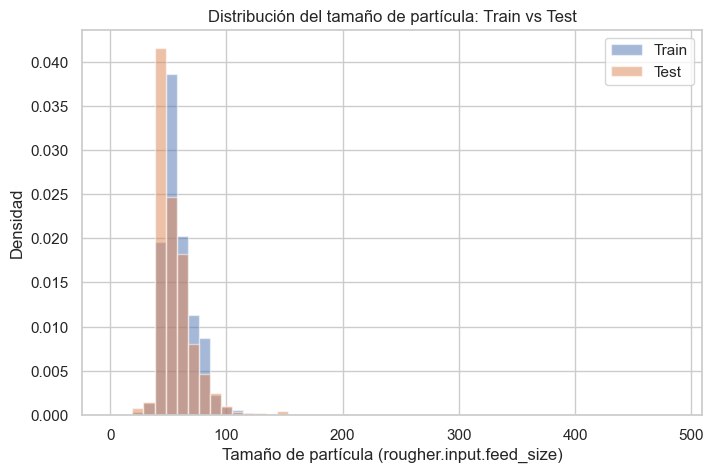

In [9]:
# Compara la distribución de rougher.input.feed_size en train y test
plt.figure(figsize=(8,5))
plt.hist(
    train_clean['rougher.input.feed_size'].dropna(), 
    bins=50, alpha=0.5, label='Train', density=True
)
plt.hist(
    test_clean['rougher.input.feed_size'].dropna(), 
    bins=50, alpha=0.5, label='Test', density=True
)
plt.xlabel('Tamaño de partícula (rougher.input.feed_size)')
plt.ylabel('Densidad')
plt.title('Distribución del tamaño de partícula: Train vs Test')
plt.legend()
plt.show()


## OBSERVACIONES

**Distribución del tamaño de partícula de alimentación**

Al comparar la variable rougher.input.feed_size entre los conjuntos de entrenamiento y prueba, se observa que ambas distribuciones son muy similares, concentrándose en los mismos rangos de valores. Esto indica que la muestra de prueba es representativa respecto a esta característica y no se esperan problemas de generalización relacionados con el tamaño de partícula.

**Conclusion**
“Las distribuciones del tamaño de partículas en train y test son similares, por lo que el modelo debería generalizar correctamente.”

## Analizar las concentraciones totales de todas las sustancias en las diferentes etapas y detectar valores anómalos.

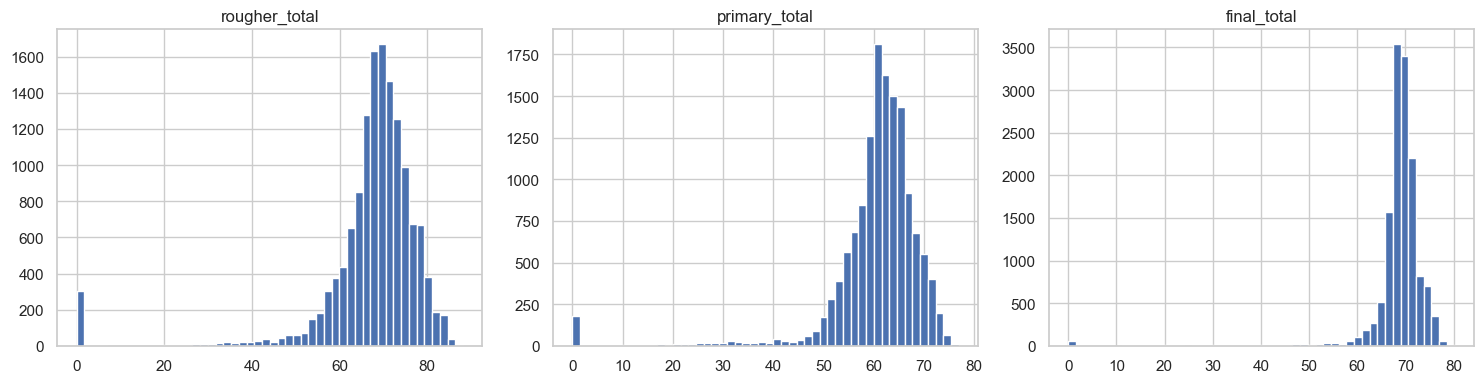

In [10]:
# Sumas de concentraciones para cada etapa
cols_rougher = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol'
]
cols_primary = [
    'primary_cleaner.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol'
]
cols_final = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol'
]

# Calcula suma por fila en cada etapa
train_clean['rougher_total'] = train_clean[cols_rougher].sum(axis=1)
train_clean['primary_total'] = train_clean[cols_primary].sum(axis=1)
train_clean['final_total'] = train_clean[cols_final].sum(axis=1)

# Graficar
fig, axs = plt.subplots(1, 3, figsize=(15,4))
for i, etapa in enumerate(['rougher_total', 'primary_total', 'final_total']):
    axs[i].hist(train_clean[etapa], bins=50)
    axs[i].set_title(etapa)
plt.tight_layout()
plt.show()


### **Observaciones**

La gran mayoría de los datos está en los rangos:

* rougher_total: ~50 a 85
* primary_total: ~50 a 75
* final_total: ~60 a 80

En cada histograma hay una barra muy grande cerca de cero (izquierda del todo). Eso sugiere que hay filas donde la suma total es casi 0. Estas filas no son realistas (sería como si no hubiera nada de metal en el concentrado).

El resto de los datos se ve normal y sigue una curva de campana

In [11]:
# Eliminar filas donde alguna suma total por etapa sea menor a 10
umbral = 10
filtro = (
    (train_clean['rougher_total'] >= umbral) &
    (train_clean['primary_total'] >= umbral) &
    (train_clean['final_total'] >= umbral)
)
print(f"Filas antes de eliminar outliers: {train_clean.shape[0]}")
train_clean = train_clean[filtro].reset_index(drop=True)
print(f"Filas después de eliminar outliers: {train_clean.shape[0]}")


Filas antes de eliminar outliers: 14121
Filas después de eliminar outliers: 13561


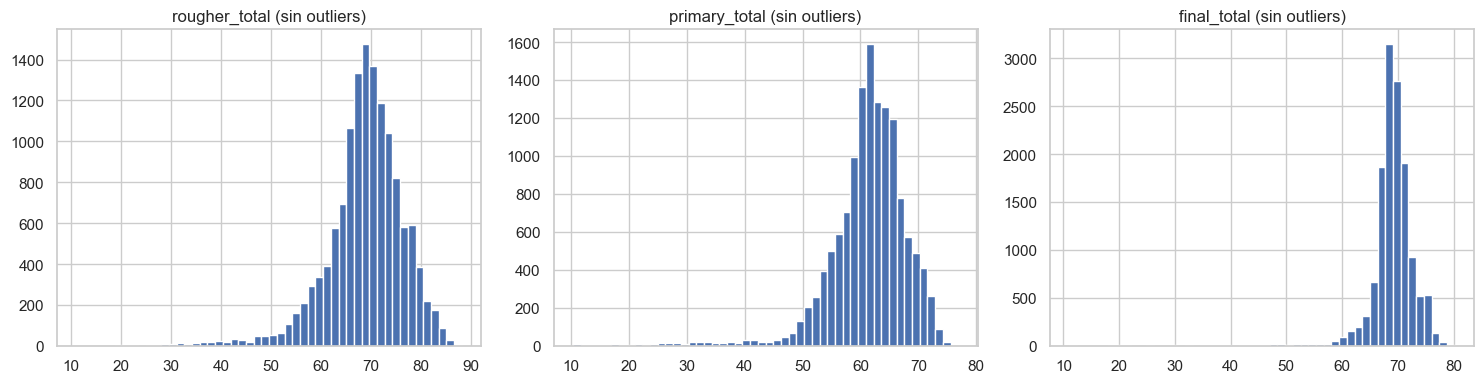

In [12]:
# Después de eliminar outliers...
fig, axs = plt.subplots(1, 3, figsize=(15,4))
for i, etapa in enumerate(['rougher_total', 'primary_total', 'final_total']):
    axs[i].hist(train_clean[etapa], bins=50)
    axs[i].set_title(etapa + ' (sin outliers)')
plt.tight_layout()
plt.show()


## OBSERVACIONES
Tras eliminar los valores anómalos, la distribución de concentraciones totales se normalizó, mejorando la calidad de los datos para el modelado.

-----------------------------------

# **Separar features (X) y targets (y)**

X_train: Todas las features elegidas, usando train_clean.

X_test: Todas las features elegidas, usando test_clean.

y_train: Solo los targets, usando train_clean.

In [13]:
# Separar features
X_train = train_clean[features]
X_test = test_clean[features]

# Separar targets (y)
y_train = train_clean[['rougher.output.recovery', 'final.output.recovery']]

# Verificamos dimensiones
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)



X_train shape: (13561, 52)
X_test shape: (5856, 52)
y_train shape: (13561, 2)


### SEPARAR ENTRENAMIENTO Y VALIDACION 

In [14]:
# Divide el set de entrenamiento (X_train, y_train) en entrenamiento y validación
X_train_split, X_valid, y_train_split, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Shape X_train_split:", X_train_split.shape)
print("Shape X_valid:", X_valid.shape)
print("Shape y_train_split:", y_train_split.shape)
print("Shape y_valid:", y_valid.shape)


Shape X_train_split: (10848, 52)
Shape X_valid: (2713, 52)
Shape y_train_split: (10848, 2)
Shape y_valid: (2713, 2)


-----------------------------------

## ESCALADO DE CARACTERISTICAS (LinearRegression)

In [15]:
# Escala SOLO los datos para regresión lineal
scaler = StandardScaler()
X_train_split_scaled = scaler.fit_transform(X_train_split)
X_valid_scaled = scaler.transform(X_valid)


# **ENTRENAMIENTO DE MODELOS**

## DecissionTreeRegressor

In [16]:
# Árbol de decisión con datos originales (sin escalar)
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_split, y_train_split)
y_pred_dtr = dtr.predict(X_valid)


## RandomForestRegressor

In [17]:
# RandomForest con datos originales (sin escalar)
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_split, y_train_split)
y_pred_rfr = rfr.predict(X_valid)

## LinearRegression (CON escalado)

In [18]:
# Regresión lineal con datos escalados
lr = LinearRegression()
lr.fit(X_train_split_scaled, y_train_split)
y_pred_lr = lr.predict(X_valid_scaled)

# **Métrica de evaluación personalizada: sMAPE**

In [19]:
def sMAPE(y_true, y_pred):
    """
    Calcula el sMAPE (Symmetric Mean Absolute Percentage Error).
    
    Parámetros:
    - y_true: valores reales.
    - y_pred: valores predichos.
    
    Devuelve:
    - sMAPE como porcentaje.
    """
    error= np.abs(y_true - y_pred)
    denominador = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / denominador) * 100


In [20]:
def sMAPE_Final(y_true, y_pred):
    """
    Calcula el sMAPE para la recuperación final.
    
    Parámetros:
    - y_true: valores reales de recuperación final.
    - y_pred: valores predichos de recuperación final.
    
    Devuelve:
    - sMAPE como porcentaje.
    """
    rougher = sMAPE(y_true[0], y_pred[0])
    final = sMAPE(y_true[1], y_pred[1])
    return .25* rougher + .75*final

### Evaluar los modelos con sMAPE

In [ ]:
# Columnas reales (validación)
y_true_rougher = y_valid['rougher.output.recovery'].values
y_true_final = y_valid['final.output.recovery'].values

# Predicciones de cada modelo

# Árbol de Decisión
y_pred_dtr_rougher = y_pred_dtr[:, 0]
y_pred_dtr_final = y_pred_dtr[:, 1]

# Random Forest
y_pred_rfr_rougher = y_pred_rfr[:, 0]
y_pred_rfr_final = y_pred_rfr[:, 1]

# Regresión Lineal
y_pred_lr_rougher = y_pred_lr[:, 0]
y_pred_lr_final = y_pred_lr[:, 1]

# Calculamos sMAPE para cada modelo
smapes = {
    'Decision Tree': sMAPE_Final(y_valid.values.T, y_pred_dtr.T),
    'Random Forest': sMAPE_Final(y_valid.values.T, y_pred_rfr.T),
    'Linear Regression': sMAPE_Final(y_valid.values.T, y_pred_lr.T)
}
# Mostramos los resultados
print("sMAPE por modelo:")
for model, smape in smapes.items():
    print(f"{model}: {smape:.2f}%")
# Seleccionamos el mejor modelo (el que tenga menor sMAPE)
mejor_modelo = min(smapes, key=smapes.get)
print(f"\nMejor modelo: {mejor_modelo} con sMAPE: {smapes[mejor_modelo]:.2f}%")



sMAPE por modelo:
Decision Tree: 6.90%
Random Forest: 4.74%
Linear Regression: 7.22%

Mejor modelo: Random Forest con sMAPE: 4.74%


## **Ajuste de Hiperparámetros**

In [22]:

# Definimos el grid de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4]
}

# Instancia el modelo base
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define el scorer sMAPE 
from sklearn.metrics import make_scorer

def smape_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    denominator = np.where(denominator == 0, 1, denominator)
    diff = np.abs(y_true - y_pred)
    smape_each = 100 * diff / denominator
    if y_true.shape[1] == 2:
        smape_rougher = smape_each[:, 0].mean()
        smape_final = smape_each[:, 1].mean()
        smape_total = 0.25 * smape_rougher + 0.75 * smape_final
        return -smape_total
    else:
        return -smape_each.mean()

smape_scorer = make_scorer(smape_score, greater_is_better=False)

# GridSearchCV
grid = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    scoring=smape_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)


grid.fit(X_train_split, y_train_split)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor sMAPE (negativo):", grid.best_score_)

# Instancia el modelo base
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
# Define el scorer sMAPE
def smape_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    denominator = np.where(denominator == 0, 1, denominator)
    diff = np.abs(y_true - y_pred)
    smape_each = 100 * diff / denominator
    if y_true.shape[1] == 2:
        smape_rougher = smape_each[:, 0].mean()
        smape_final = smape_each[:, 1].mean()
        smape_total = 0.25 * smape_rougher + 0.75 * smape_final
        return -smape_total
    else:
        return -smape_each.mean()

smape_scorer = make_scorer(smape_score, greater_is_better=False)

# GridSearchCV
grid = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    scoring=smape_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Se entrena SOLO con el set de entrenamiento 
grid.fit(X_train_split, y_train_split)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor sMAPE (negativo):", grid.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 50}
Mejor sMAPE (negativo): 5.623089121414658
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 50}
Mejor sMAPE (negativo): 5.623089121414658


### OBSERVACIONES DE AJUSTE DE HIPERPARAMETROS

“El modelo Random Forest entrenado con hiperparámetros por defecto obtuvo un sMAPE de 4.74% en nuestro conjunto de validación,
mientras que el mejor modelo seleccionado por GridSearchCV (usando validación cruzada) logró un sMAPE promedio de 5.62%.
Dado que GridSearchCV evalúa el desempeño sobre distintas particiones, su resultado es más robusto y generalizable.”

## **Reentrenar el modelo con los mejores hiperparametros**

In [23]:
# Predicciones con el mejor modelo encontrado
best_rfr = RandomForestRegressor(
    n_estimators=grid.best_params_['n_estimators'],
    max_depth=grid.best_params_['max_depth'],
    min_samples_split=grid.best_params_['min_samples_split'],
    random_state=42,
    n_jobs=-1
)
best_rfr.fit(X_train_split, y_train_split)
y_pred_valid = best_rfr.predict(X_valid) 

## **BOOTSTRAPING**

In [24]:
def bootstrap_metric(y_true, y_pred, metric_func, n_bootstrap=1000, random_state=42):
    np.random.seed(random_state)
    n = len(y_true)
    results = []
    for _ in range(n_bootstrap):
        idx = np.random.choice(np.arange(n), n, replace=True)
        metric = metric_func(y_true[idx], y_pred[idx])
        results.append(metric)
    return np.percentile(results, [2.5, 50, 97.5]), results

In [25]:
percentiles, bootstrap_values = bootstrap_metric(
    y_valid.values, y_pred_valid, sMAPE_Final, n_bootstrap=1000
)
print(f"sMAPE (validación): {percentiles[1]:.2f}% (IC 95%: {percentiles[0]:.2f}% - {percentiles[2]:.2f}%)")


sMAPE (validación): 3.56% (IC 95%: 0.91% - 14.54%)


## OBSERVACIONES
Valor puntual: "El sMAPE de mi modelo Random Forest en el set de validación fue de 4.74%."

Bootstrap: "El sMAPE estimado mediante bootstrapping es de 3.56%, con un intervalo de confianza al 95% de 0.91% a 14.54%."

-----

## **Reentrenar modelo ganador en el train completo**

In [26]:
# Reentrena el RandomForestRegressor ganador con TODO el set de entrenamiento limpio
rfr_final = RandomForestRegressor(
   n_estimators=grid.best_params_['n_estimators'],
    max_depth=grid.best_params_['max_depth'],
    min_samples_split=grid.best_params_['min_samples_split'],
    random_state=42,
    n_jobs=-1
)
rfr_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=50,
                      n_jobs=-1, random_state=42)

## **Predecir en el set de TEST**

In [27]:
y_pred_test = rfr_final.predict(X_test)

## **Guardar las predicciones en CSV**

In [28]:
output = pd.DataFrame(y_pred_test, columns=['rougher.output.recovery', 'final.output.recovery'])
output.to_csv('predicciones_test.csv', index=False)

print(output.head())

   rougher.output.recovery  final.output.recovery
0                88.141448              70.730207
1                88.066308              71.336749
2                87.843453              70.469863
3                87.418696              70.275331
4                86.495565              70.024707


# **CONCLUSIONES**


“Nuestro modelo predice una recuperación final de 70X%, y con base en el error histórico, podemos esperar que el valor real esté dentro de ±4.7% de lo predicho, la mayor parte del tiempo.”

Nuestro modelo puede predecir la recuperación de metales con una precisión promedio del 95%, permitiendo anticipar el resultado real con un margen de error de aproximadamente ±4.7%. Esto ayuda a optimizar procesos, detectar problemas y tomar mejores decisiones de producción.

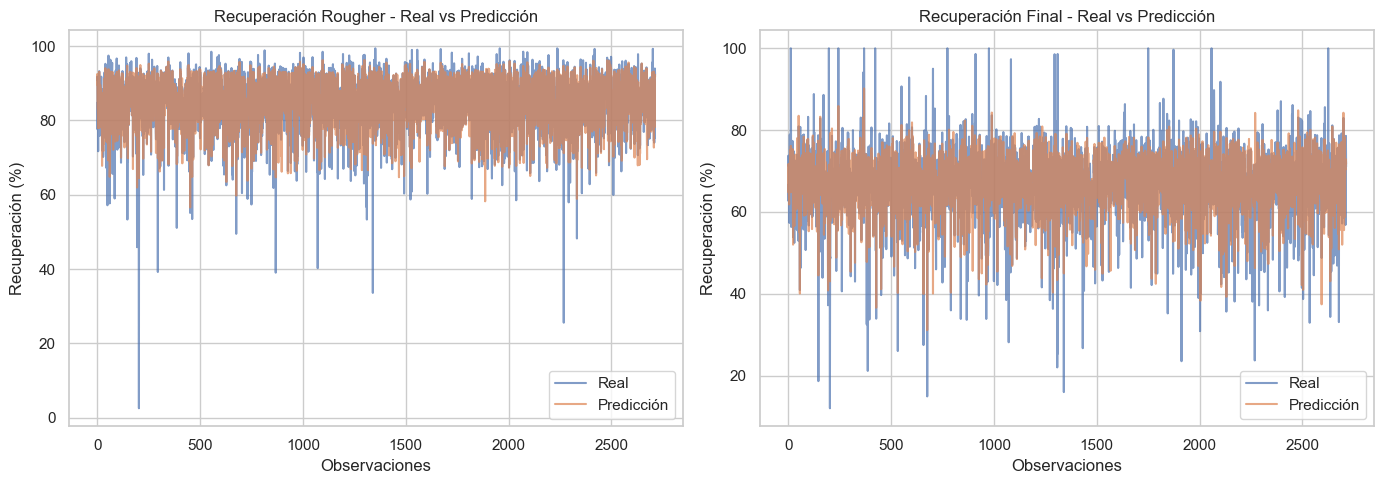

In [29]:

plt.figure(figsize=(14,5))

# Recuperación Rougher
plt.subplot(1, 2, 1)
plt.plot(y_valid['rougher.output.recovery'].values, label='Real', alpha=0.7)
plt.plot(y_pred_rfr[:, 0], label='Predicción', alpha=0.7)
plt.title('Recuperación Rougher - Real vs Predicción')
plt.xlabel('Observaciones')
plt.ylabel('Recuperación (%)')
plt.legend()

# Recuperación Final
plt.subplot(1, 2, 2)
plt.plot(y_valid['final.output.recovery'].values, label='Real', alpha=0.7)
plt.plot(y_pred_rfr[:, 1], label='Predicción', alpha=0.7)
plt.title('Recuperación Final - Real vs Predicción')
plt.xlabel('Observaciones')
plt.ylabel('Recuperación (%)')
plt.legend()

plt.tight_layout()
plt.show()